## Exploring the increase in structural similarity within the terminal categories as ECDFs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os

In [2]:
import sys

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [4]:
df = pd.read_excel(interim_dir+'mediod_new_universe_090524.xlsx', index_col = [0])

In [5]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [6]:
from model_functions import *

In [8]:
res = {}
for i, group in df[['dtxsid','final_centroid',
 'final_dist',
 'group',
 'group_str',]].groupby('group_str'):
    res[i] = ecdf(list(group['final_dist']))

In [15]:
list(res.keys())[0:100:3]

["('Aromatic PFASs', 'gte7', nan, nan)",
 "('Aromatic PFASs', 'lt7', 2.0, 2.0)",
 "('Aromatic PFASs', 'lt7', 2.0, 5.0)",
 "('Aromatic PFASs', 'lt7', 4.0, 2.0)",
 "('HFCs', 'lt7', 1.0, nan)",
 "('Other PFASs', 'gte7', nan, nan)",
 "('Other PFASs', 'lt7', 2.0, 2.0)",
 "('Other PFASs', 'lt7', 3.0, 2.0)",
 "('Other PFASs, cyclic', 'gte7', 2.0, nan)",
 "('Other PFASs, cyclic', 'lt7', 1.0, 1.0)",
 "('Other PFASs, cyclic', 'lt7', 2.0, nan)",
 "('Other PFASs, cyclic', 'lt7', 3.0, 3.0)",
 "('PFAA precursors', 'gte7', nan, nan)",
 "('PFAA precursors', 'lt7', 1.0, 3.0)",
 "('PFAA precursors', 'lt7', 2.0, 2.0)",
 "('PFAA precursors', 'lt7', 3.0, 2.0)",
 "('PFAA precursors', 'lt7', 4.0, 2.0)",
 "('PFAA precursors, cyclic', 'lt7', 1.0, 1.0)",
 "('PFAA precursors, cyclic', 'lt7', 2.0, nan)",
 "('PFAA precursors, cyclic', 'lt7', 3.0, 3.0)",
 "('PFAAs', 'lt7', 2.0, nan)",
 "('PFAAs, cyclic', 'gte7', nan, nan)",
 "('PFAAs, cyclic', 'lt7', 3.0, 1.0)",
 "('PolyFCA derivatives', 'gte7', nan, nan)",
 "('Pol

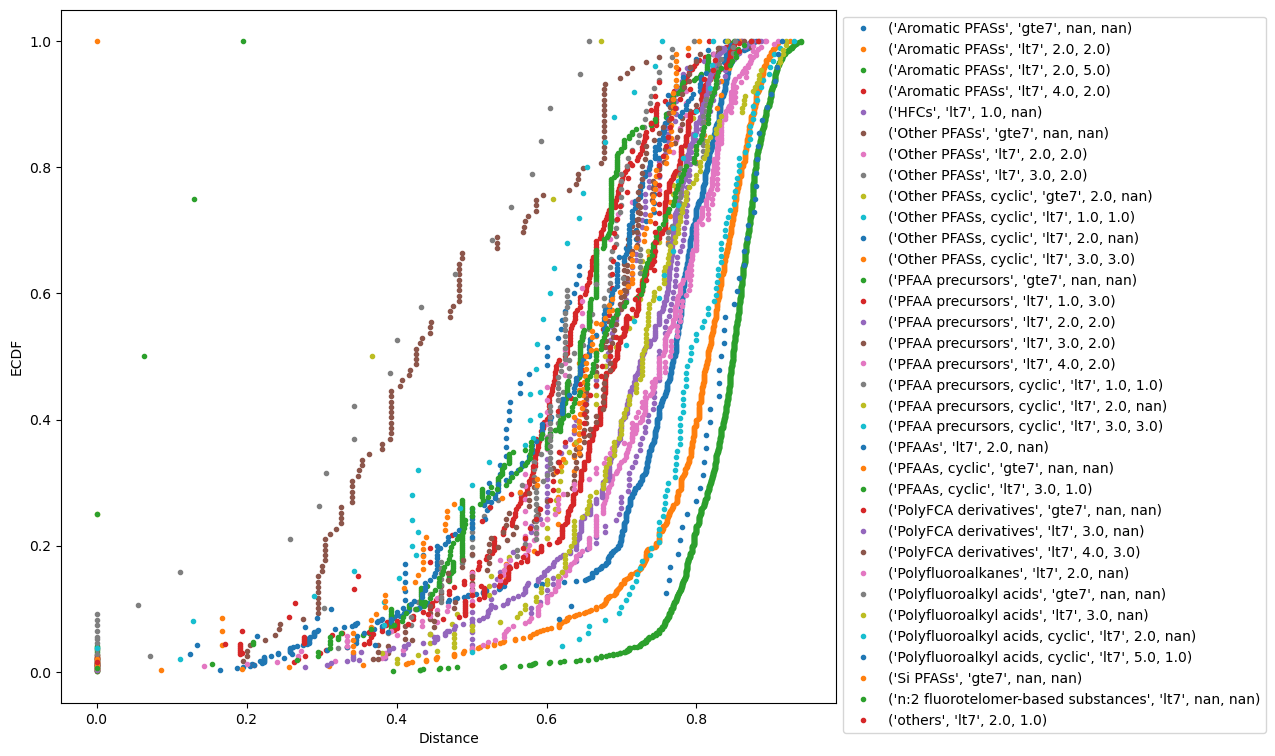

In [17]:
fig, ax = plt.subplots(figsize = (10,9))
for k, v in list(res.items())[:100:3]:
    ax.set_xlabel('Distance')
    ax.set_ylabel('ECDF')
    ax.plot(v[0], v[1], marker = '.', linestyle = 'none', label = k)
    ax.legend(bbox_to_anchor=(1,1))
fig.savefig(figures_dir+'FigureS4_shiftECDF_100524.png')